dict_keys(['lastUpdateTime', 'chinaTotal', 'chinaAdd', 'isShowAdd', 'showAddSwitch', 'areaTree'])
34
香港 台湾 上海 辽宁 北京 广东 四川 福建 内蒙古 陕西 云南 浙江 天津 山东 黑龙江 河南 山西 江苏 安徽 湖南 广西 江西 澳门 河北 西藏 湖北 甘肃 青海 海南 吉林 重庆 宁夏 贵州 新疆 

nowConfirm
confirm
suspect
dead
deadRate
showRate
heal
healRate
showHeal
{'香港': 8923, '台湾': 808, '上海': 1520, '辽宁': 359, '北京': 988, '广东': 2049, '四川': 853, '福建': 514, '内蒙古': 364, '陕西': 508, '云南': 230, '浙江': 1306, '天津': 313, '山东': 863, '黑龙江': 964, '河南': 1299, '山西': 224, '江苏': 684, '安徽': 993, '湖南': 1021, '广西': 264, '江西': 935, '澳门': 46, '河北': 373, '西藏': 1, '湖北': 68149, '甘肃': 182, '青海': 18, '海南': 171, '吉林': 157, '重庆': 590, '宁夏': 75, '贵州': 147, '新疆': 980}
{'香港': 805, '台湾': 115, '上海': 89, '辽宁': 70, '北京': 35, '广东': 30, '四川': 28, '福建': 25, '内蒙古': 23, '陕西': 15, '云南': 13, '浙江': 12, '天津': 10, '山东': 9, '黑龙江': 9, '河南': 7, '山西': 3, '江苏': 2, '安徽': 1, '湖南': 1, '广西': 1, '江西': 0, '澳门': 0, '河北': 0, '西藏': 0, '湖北': 0, '甘肃': 0, '青海': 0, '海南': 0, '吉林': 0, '重庆': 0, '宁夏': 0, '贵州': 0, '新疆': 0}
dict_keys(['香港',

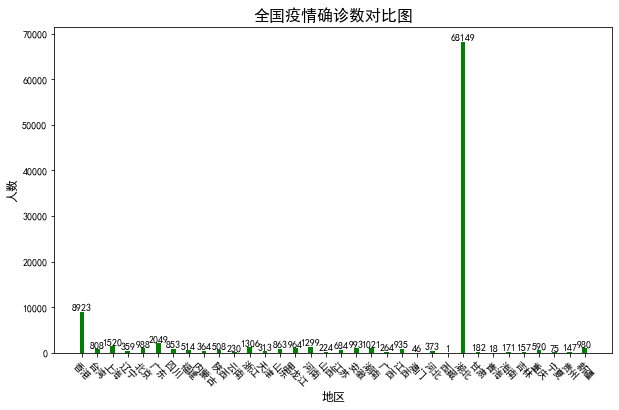

dict_keys(['香港', '台湾', '上海', '辽宁', '北京', '广东', '四川', '福建', '内蒙古', '陕西', '云南', '浙江', '天津', '山东', '黑龙江', '河南', '山西', '江苏', '安徽', '湖南', '广西', '江西', '澳门', '河北', '西藏', '湖北', '甘肃', '青海', '海南', '吉林', '重庆', '宁夏', '贵州', '新疆'])
dict_values([805, 115, 89, 70, 35, 30, 28, 25, 23, 15, 13, 12, 10, 9, 9, 7, 3, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


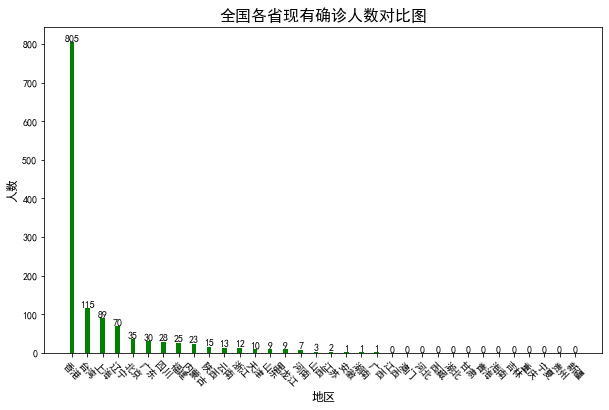

In [2]:
# 第一步：抓取数据

# 导入需要的库
import time, json, requests

# 抓取腾讯疫情实时json数据,后面加上时间戳
url = 'https://view.inews.qq.com/g2/getOnsInfo?name=disease_h5&callback=&_=%d'%int(time.time()*1000)
data = json.loads(requests.get(url=url).json()['data'])
# print(data)

print(data.keys())

# 统计省份信息(34个省份 湖北 广东 河南 浙江 湖南 安徽....)
num = data['areaTree'][0]['children']
print(len(num))
for item in num:
    print(item['name'],end=" ")   
else:
    print("\n")  
    
# 显示湖北省数据
hubei = num[30]['children'][0]['total']
for data in hubei:
    print(data)

# 解析各省累计确诊人数
total_data = {} 
for item in num:
    if item['name'] not in total_data:
        total_data.update({item['name']:0})
    for city_data in item['children']:
        total_data[item['name']] +=int(city_data['total']['confirm'])    
print(total_data)

# 解析各省现有确诊人数
now_confirm_data = {} 
for item in num:
    if item['name'] not in now_confirm_data:
        now_confirm_data.update({item['name']:0})
    for city_data in item['children']:
        now_confirm_data[item['name']] +=int(city_data['total']['nowConfirm'])    
print(now_confirm_data)




# 第二步：绘制柱状图
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# -----------------------------1.绘制各省累计确诊数据-----------------------------------

# 获取数据
names = total_data.keys() # 省份
nums = total_data.values() # 确诊人数
print(names)
print(nums)

# 绘图
plt.figure(figsize=[10, 6])
plt.bar(names, nums, width=0.3, color='green')

# 设置标题
plt.xlabel("地区", fontproperties='SimHei', size=12)
plt.ylabel("人数", fontproperties='SimHei', rotation=90, size=12)
plt.title("全国疫情确诊数对比图", fontproperties='SimHei', size=16)
plt.xticks(list(names), fontproperties='SimHei', rotation=-45, size=10)

# 显示数字
for a, b in zip(list(names), list(nums)):
    plt.text(a, b, b, ha='center', va='bottom', size=10)
plt.savefig('全国疫情确诊人数对比图.png')  # 保存为文件
plt.show()


# -----------------------------2.绘制现有确诊数据-----------------------------------
plt.figure(figsize=(10,6)) #图片大小

names = now_confirm_data.keys()
nums = now_confirm_data.values()
print(names)
print(nums)
plt.bar(names, nums, width=0.3, color='green')

# 设置标题
plt.xlabel("地区", fontproperties='SimHei', size=12)
plt.ylabel("人数", fontproperties='SimHei', rotation=90, size=12)
plt.title("全国各省现有确诊人数对比图", fontproperties='SimHei', size=16)
plt.xticks(list(names), fontproperties='SimHei', rotation=-45, size=10)

# 显示数字
for a, b in zip(list(names), list(nums)):
    plt.text(a, b, b, ha='center', va='bottom', size=10)
plt.savefig('全国各省现有确诊人数对比图.png')  # 保存为文件
plt.show()
